<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg8/Tassya_Haberman_Dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Tassya Ramadhanti**
# **NIM  : 1103204016**
# **Studying Support Vector Machine (SVM) for classification using [Haberman Dataset](https://www.kaggle.com/datasets/dzikrifaizziyan/haberman-dataset/data).**

# Pengambilan Data dari API Kaggle
---


Pastikan sudah menginstal pustaka Kaggle dengan menjalankan perintah seperti dibawah ini:

In [1]:
#Install modul kaggle
!pip install kaggle

Prompt ChatGPT:
berikan kodingan untuk mengimpor file kaggle.json ke google collab

In [2]:
from google.colab import files

# Upload file kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tassyaramadhanti","key":"0100ff86eefed89e942ccf669125b605"}'}

Prompt ChatGPT:
berikan codingan untuk membuat direktori kaggle kemudian pindahkan file kaggle.json yang sudah kita impor tadi kedalam direktori

In [3]:
# Membuat direktori Kaggle
!mkdir -p ~/.kaggle

# Pindahkan file kaggle.json ke direktori Kaggle
!mv kaggle.json ~/.kaggle/

In [18]:
# Mencari dataset yang tersedia di kaggle
!kaggle datasets list -s "Haberman Dataset"

ref                                               title                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  ----------------------------------  -----  -------------------  -------------  ---------  ---------------  
sachinkalsi/haberman                              haberman dataset                      1KB  2017-11-10 17:16:08            208          8  0.29411766       
dzikrifaizziyan/haberman-dataset                  Haberman Dataset                      3KB  2021-06-11 10:35:10            287          5  0.7058824        
krishnaravi17/haberman-cancer-dataset             Haberman cancer Dataset               1KB  2018-08-07 00:46:42            283          5  0.29411766       
akshatanand/habermancsv                           haberman dataset                     998B  2020-03-24 15:30:28              9          3  0.1764706        
shreyasharma319/haberman-cancer-survival-dataset  Ha

Pilih dataset yang ingin digunakan dari list dataset yang tersedia diatas, kemudian download dataset

In [19]:
# Download dan ekstrak dataset, dimana nantinya akan satu direktori dengan notebook ini
!kaggle datasets download dzikrifaizziyan/haberman-dataset --unzip

  0% 0.00/2.93k [00:00<?, ?B/s]
100% 2.93k/2.93k [00:00<00:00, 8.92MB/s]


Dataset nantinya akan berada dalam direktori kaggle, seperti dibawah ini:

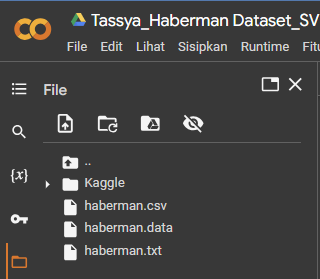

## Library Yang Digunakan
---

In [48]:
# Import library
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

fungsi dari setiap library:

- import pandas as pd: untuk manipulasi dan analisis data.
- from sklearn.svm import SVC: untuk model klasifikasi menggunakan metode Support Vector Machine (SVM).
- import matplotlib.pyplot as plt:untuk membuat visualisasi seperti grafik dan plot.
- import seaborn as sns: Seaborn adalah library untuk membuat visualisasi data statistik.
- from sklearn.model_selection import train_test_split: untuk memisahkan data menjadi data latih dan data uji.
- from sklearn.preprocessing import StandardScaler: untuk standarisasi fitur agar memiliki mean=0 dan deviasi standar=1.
- from sklearn.model_selection import GridSearchCV: untuk mencari kombinasi hyperparameter terbaik untuk model menggunakan metode validasi silang (cross-validation).
- from sklearn.metrics import accuracy_score: untuk mengukur akurasi model, yaitu sejauh mana prediksi model cocok dengan data aktual.

Prompt ChatGPT:
beri kode untuk membaca dataset menjadi dataframe

In [38]:
# memuat data
df = pd.read_csv("haberman.csv")

# menampilkan 5 baris pertama dataset
df.head()

,Age_of_patient_at_time_of_operation,Patient_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [39]:
# Mengganti nama kolom
df.rename(columns={
    'Age_of_patient_at_time_of_operation': 'Age',
    'Patient_year_of_operation': 'Operation_Year',
    'Number_of_positive_axillary_nodes_detected': 'Axillary_Nodes',
    'Survival_status': 'Survival_Status'
}, inplace=True)

print(df.head())

   Age  Operation_Year  Axillary_Nodes  Survival_Status
0   30              64               1                1
1   30              62               3                1
2   30              65               0                1
3   31              59               2                1
4   31              65               4                1


In [40]:
#Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_Year   306 non-null    int64
 2   Axillary_Nodes   306 non-null    int64
 3   Survival_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [41]:
# Menampilkan jumlah nilai yang hilang untuk setiap kolom
df.isnull().sum()

Age                0
Operation_Year     0
Axillary_Nodes     0
Survival_Status    0
dtype: int64

Tidak ada missing value

Prompt ChatGPT: beri kode untuk melakukan SVR dengan target "Survival_Status"

In [51]:
# Pisahkan fitur (X) dan target (y)
X = df[['Age', 'Operation_Year']]
y = df['Survival_Status']

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Melatih model SVC
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [52]:
# Akurasi model
clf.score(X_test, y_test)

0.7326732673267327

Dalam kode di atas, fitur X atau 'Age, Operation_Year' di-standarisasi menggunakan StandardScaler sebelum diterapkan pada model SVC. Standarisasi ini membantu model untuk lebih efektif belajar dari data dan meningkatkan interpretasi hasilnya.

# Visualisasi

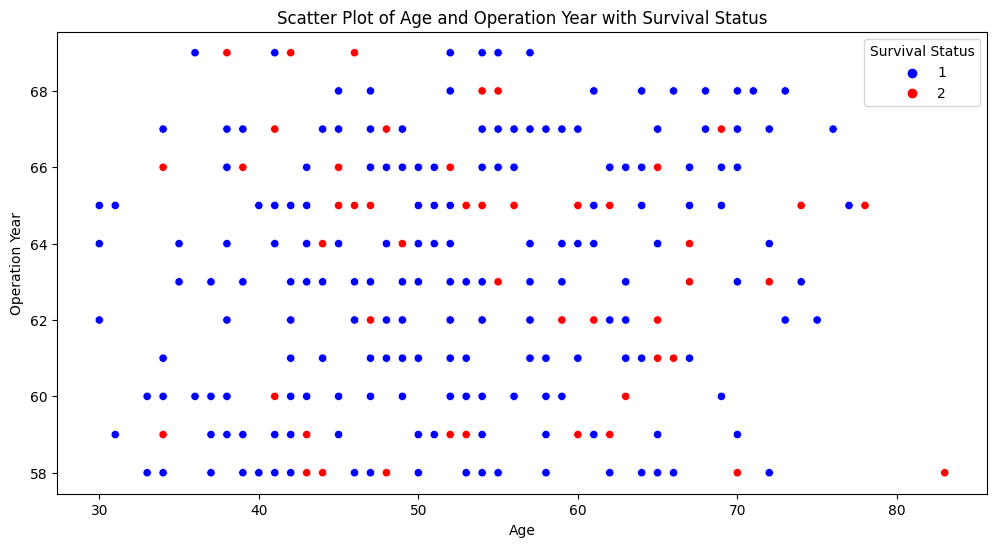

In [59]:
# Set palet sesuai dengan nilai 'Survival_Status'
palette = {1: "blue", 2: "red"}

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Age", y="Operation_Year", hue="Survival_Status", data=df, palette=palette, hue_order=[1, 2])
plt.xlabel("Age")
plt.ylabel("Operation Year")
plt.legend(title="Survival Status")
plt.show()

#Survival_Status:

1 = pasien bertahan hidup 5 tahun atau lebih

2 = pasien meninggal dalam waktu 5 tahun